<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/14-PCA-Principal-Component-Analysis/02_PCA_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/csv_files/cancer_tumor_data_features.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA with Scikit-Learn


### Scaling Data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled_x = scaler.fit_transform(df)

In [8]:
from sklearn.decomposition import PCA

In [ ]:
help(PCA)

In [10]:
pca_model = PCA(n_components=2)

In [11]:
pca_model.fit(scaled_x)

PCA(n_components=2)

In [12]:
pca_model.transform(scaled_x)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [13]:
pc_results = pca_model.fit_transform(scaled_x)

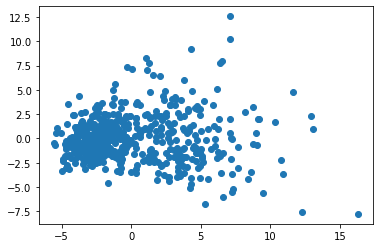

In [17]:
plt.scatter(pc_results[:,0],pc_results[:,1])

In [18]:
from sklearn.datasets import load_breast_cancer
cancer_dictionary = load_breast_cancer()

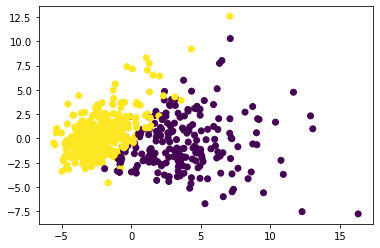

In [20]:
plt.scatter(pc_results[:,0],pc_results[:,1],c=cancer_dictionary['target'])

## Fitted Model Attributes

In [21]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.


In [22]:
df_comp = pd.DataFrame(pca_model.components_,index=['PC1','PC2'],columns=df.columns)

In [23]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


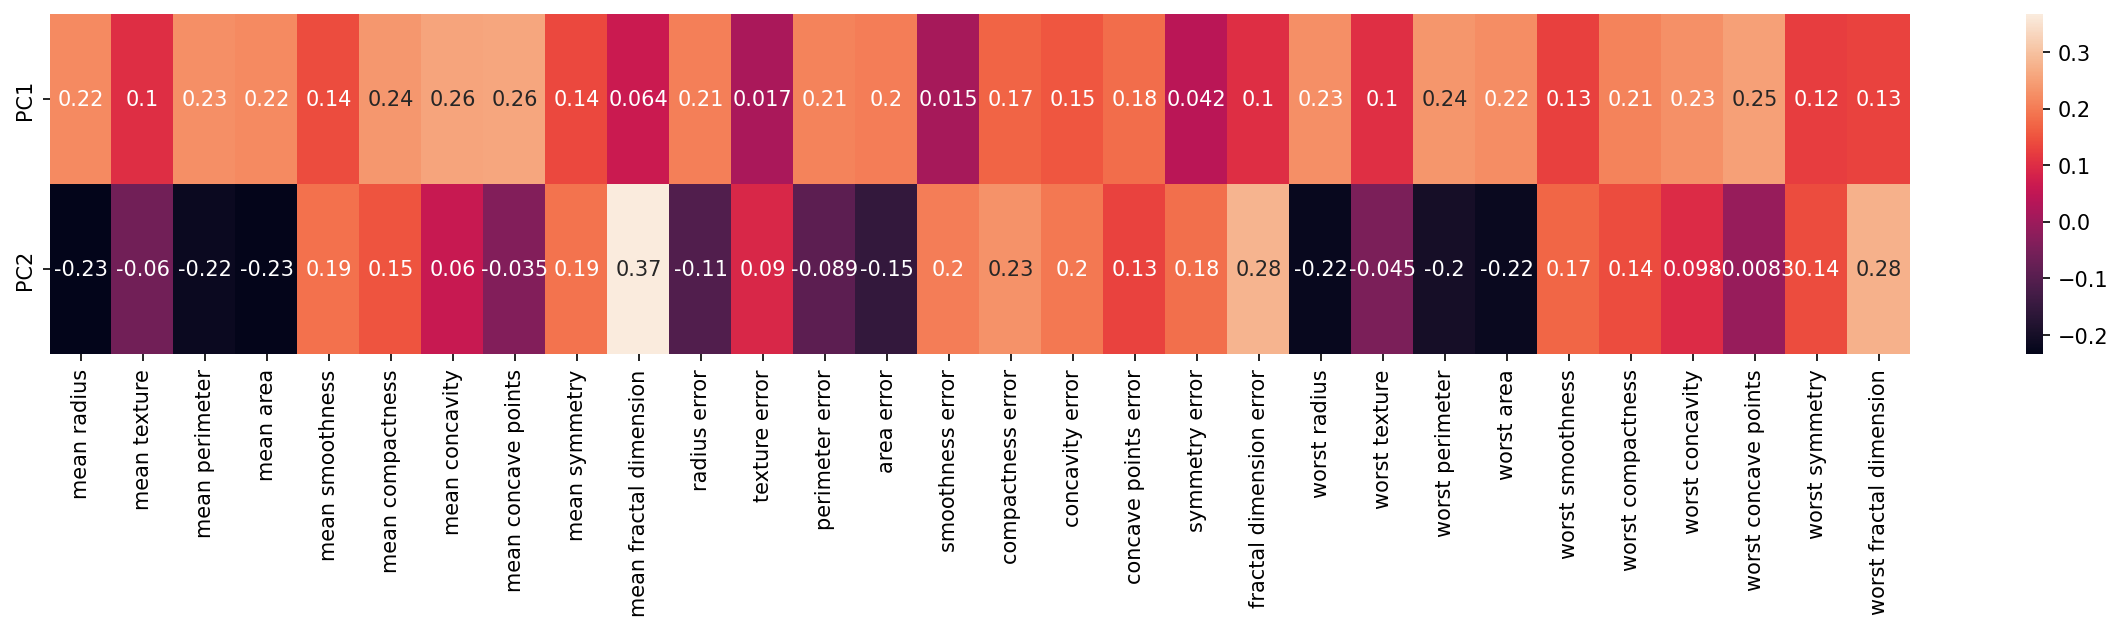

In [24]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(data=df_comp,annot=True)

In [26]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [27]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155949

In [28]:
pca_30 = PCA(n_components=30)

In [29]:
pca_30.fit(scaled_x)

PCA(n_components=30)

In [31]:
np.sum(pca_30.explained_variance_ratio_)

1.0

In [34]:
explained_variance = []

for n in range(1,30):
  pca = PCA(n_components=n)
  pca.fit(scaled_x)

  explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varience Explained')

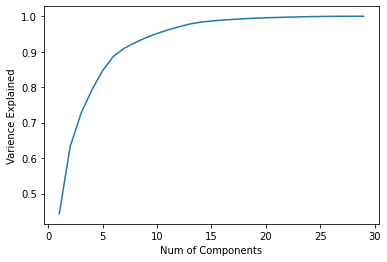

In [35]:
plt.plot(range(1,30),explained_variance)
plt.xlabel('Num of Components')
plt.ylabel('Varience Explained')